In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import json
import os

In [3]:
train_language_types = ["en"]
train_language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]

In [7]:

answers_matx = np.zeros((8, 15590))
train_language_array = np.zeros(15590)
avg_accuracy = np.zeros((8, len(train_language_types)))
for i in range(8):
    num_points = 0
    checkpoint = ["00500", "01500", "02000", "02500", "05000", "10000", "20000", "30000"][i]
    model_path = f"/data/katie_kang/trlx/examples/ckpts/sft_arc_multilingual_llama7B/checkpoint_{checkpoint}/hf_model"
    # for language in train_language_types:
    for j in range(len(train_language_types)):
        language = train_language_types[j]
        answers = np.load(os.path.join(model_path, f"{language}_trainpts_correct_all.npy"))
        answers_matx[i][num_points:num_points+len(answers)] = answers
        avg_accuracy[i][j] = np.mean(answers)
        train_language_array[num_points:num_points+len(answers)] = j
        num_points += (len(answers))

/tmp/ipykernel_30065/1357647220.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', num_lines)  # You can choose other colormaps


Text(0, 0.5, 'finetune data accuracy')

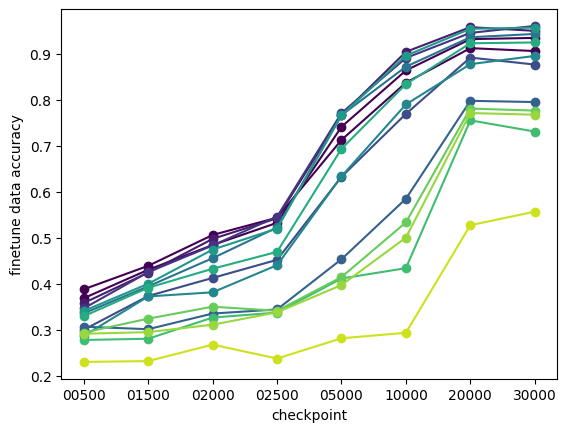

In [13]:
# avg_accuracy.shape

import matplotlib.cm as cm

num_lines = len(train_language_types)
colormap = cm.get_cmap('viridis', num_lines)  # You can choose other colormaps
# x_points = [5, 15, 20, 25, 50, 100, 200, 300]
x_points = [0, 1, 2, 3, 4, 5, 6, 7]

for i in range(len(train_language_types)):
    plt.plot(x_points, avg_accuracy[:, i], "o-",color=colormap(i / (num_lines+1)))
    # plt.plot([0, 5], [accuracies_multilingual[i], accuracies_multilingual[i]], color=colormap(i / (num_lines - 1)))



plt.xticks(x_points,["00500", "01500", "02000", "02500", "05000", "10000", "20000", "30000"])

plt.xlabel("checkpoint")

plt.ylabel("finetune data accuracy")

/tmp/ipykernel_30065/3539486493.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', num_lines)  # You can choose other colormaps


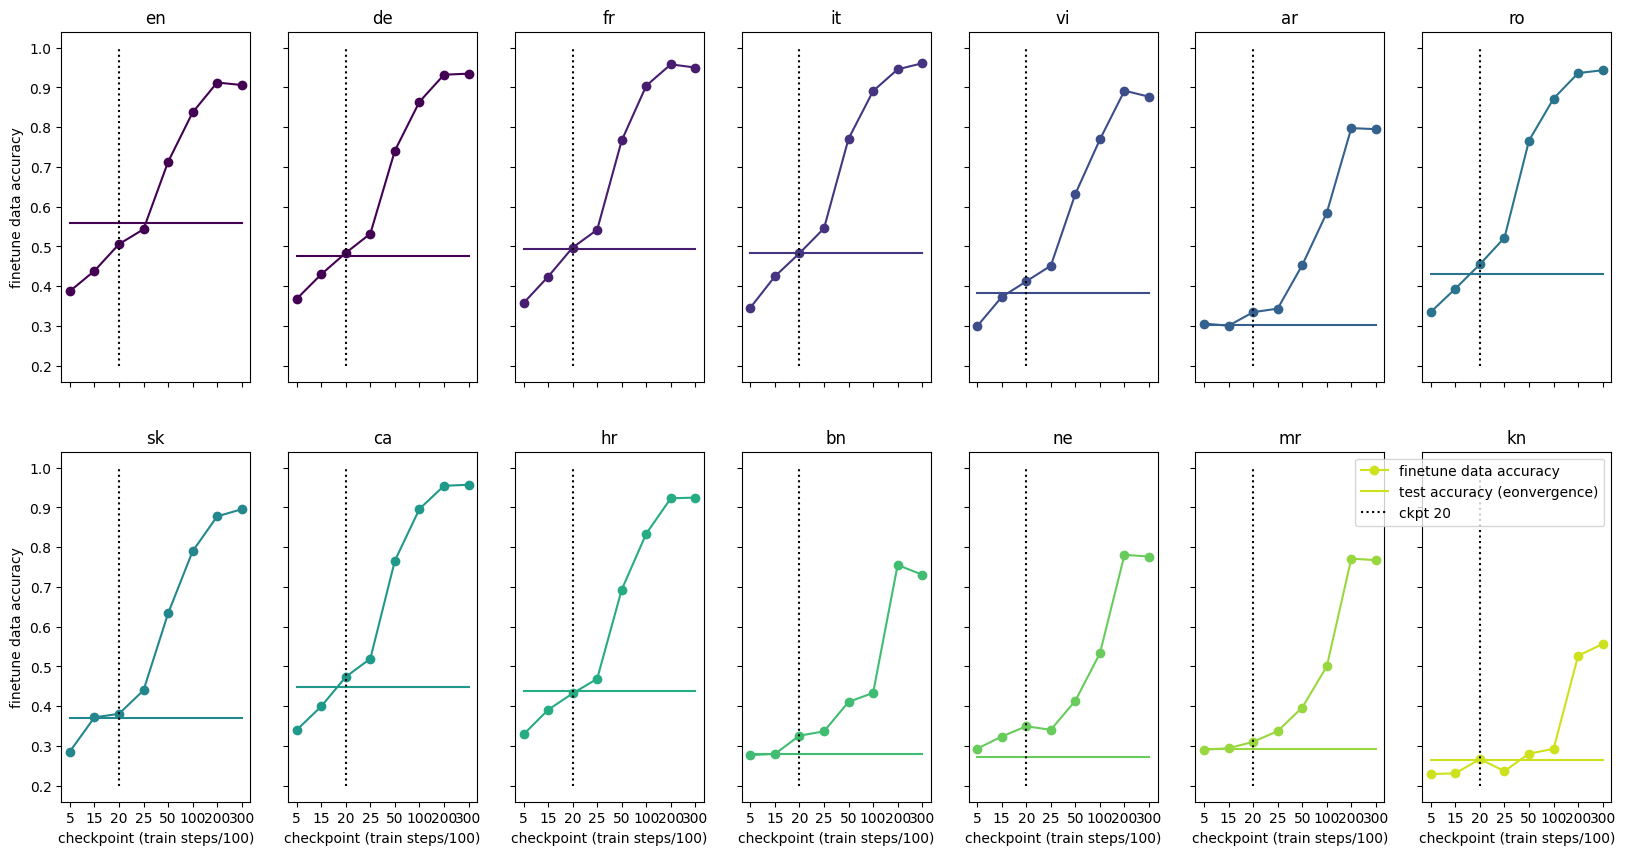

In [14]:
# avg_accuracy.shape

import matplotlib.cm as cm

num_lines = len(train_language_types)
colormap = cm.get_cmap('viridis', num_lines)  # You can choose other colormaps



fig, axs = plt.subplots(2, 7, figsize=(20, 10), sharex=True, sharey=True)

for k in range(2):
    for j in range(7):
        i = k*7+j
        axs[k][j].plot(avg_accuracy[:, i], "o-",color=colormap(i / (num_lines+1)), label = "finetune data accuracy")
        axs[k][j].plot([0, 7], [accuracies_multilingual[i], accuracies_multilingual[i]], color=colormap(i / (num_lines+1)), label = "test accuracy (eonvergence)")
        axs[k][j].plot([2, 2], [0.2, 1], color="black", linestyle= "dotted", label = "ckpt 20")
        axs[k][j].set_title(train_language_types[i])
        axs[k][j].set_xticks([0, 1, 2, 3, 4, 5, 6, 7], ["5", "15", "20", "25", "50", "100", "200", "300"])
        if k == 1:
            axs[k][j].set_xlabel("checkpoint (train steps/100)")

axs[0][0].set_ylabel("finetune data accuracy")
axs[1][0].set_ylabel("finetune data accuracy")

axs[1][6].legend()

#         idxs = np.where(train_language_array == i*7+j)
#         language = train_language_types[i*7+j]

# for i in range(len(train_language_types)):
#     plt.plot(avg_accuracy[:, i], "o-",color=colormap(i / (num_lines - 1)))
#     plt.plot([0, 5], [accuracies_multilingual[i], accuracies_multilingual[i]], color=colormap(i / (num_lines - 1)))


# plt.xticks([0, 1, 2, 3, 4, 5],["00500", "01500", "02500", "05000", "10000", "20000"])

# plt.xlabel("checkpoint")

# plt.ylabel("finetune data accuracy")

In [10]:
def map_letters_to_numbers(letter):
    if letter == "2":
        return 1
    if letter == "1":
        return 0
    if letter == "3":
        return 2
    if letter == "4":
        return 3
    return ord(letter) - ord("A")


accuracies_multilingual = []
likelihoods_multilingual = []
likelihoods_gt_multilingual = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_multilingual_llama7B/checkpoint_20000/hf_model"

for language in train_language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_multilingual.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_multilingual.append(A_to_D_logits_all.sum(-1).mean())
    likelihoods_gt_multilingual.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_multilingual = np.array(accuracies_multilingual)
likelihoods_multilingual = np.array(likelihoods_multilingual)
likelihoods_gt_multilingual = np.array(likelihoods_gt_multilingual)

In [19]:
accuracies_multilingual

array([0.55793991, 0.47733105, 0.49358426, 0.48417451, 0.38205128,
       0.30367836, 0.43101971, 0.36954662, 0.44854202, 0.43798118,
       0.28058169, 0.27288281, 0.29350649, 0.26480836])

In [5]:
a = np.concatenate([[answers_matx[0]] for _ in range(1000)], axis=0)
b = np.concatenate([[answers_matx[1]] for _ in range(1000)], axis=0)
c = np.concatenate([[answers_matx[2]] for _ in range(1000)], axis=0)
d = np.concatenate([[answers_matx[3]] for _ in range(1000)], axis=0)
e = np.concatenate([[answers_matx[4]] for _ in range(1000)], axis=0)
f = np.concatenate([[answers_matx[5]] for _ in range(1000)], axis=0)
img = np.concatenate([a, b, c, d, e, f], axis=0)

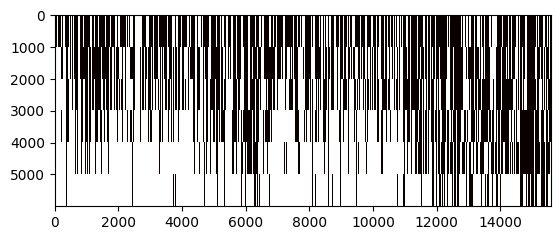

In [6]:
plt.imshow(img, cmap='hot', interpolation='nearest')

0.6386153387048642
0.6445639187574671
0.6587656529516994
0.653995229576625
0.569618366129994
0.4643390032826022
0.6376615569582206
0.5664877757901013
0.6460573476702509
0.6065769805680119
0.41568804576934654
0.4476744186046512
0.43177737881508077
0.29981634527089074


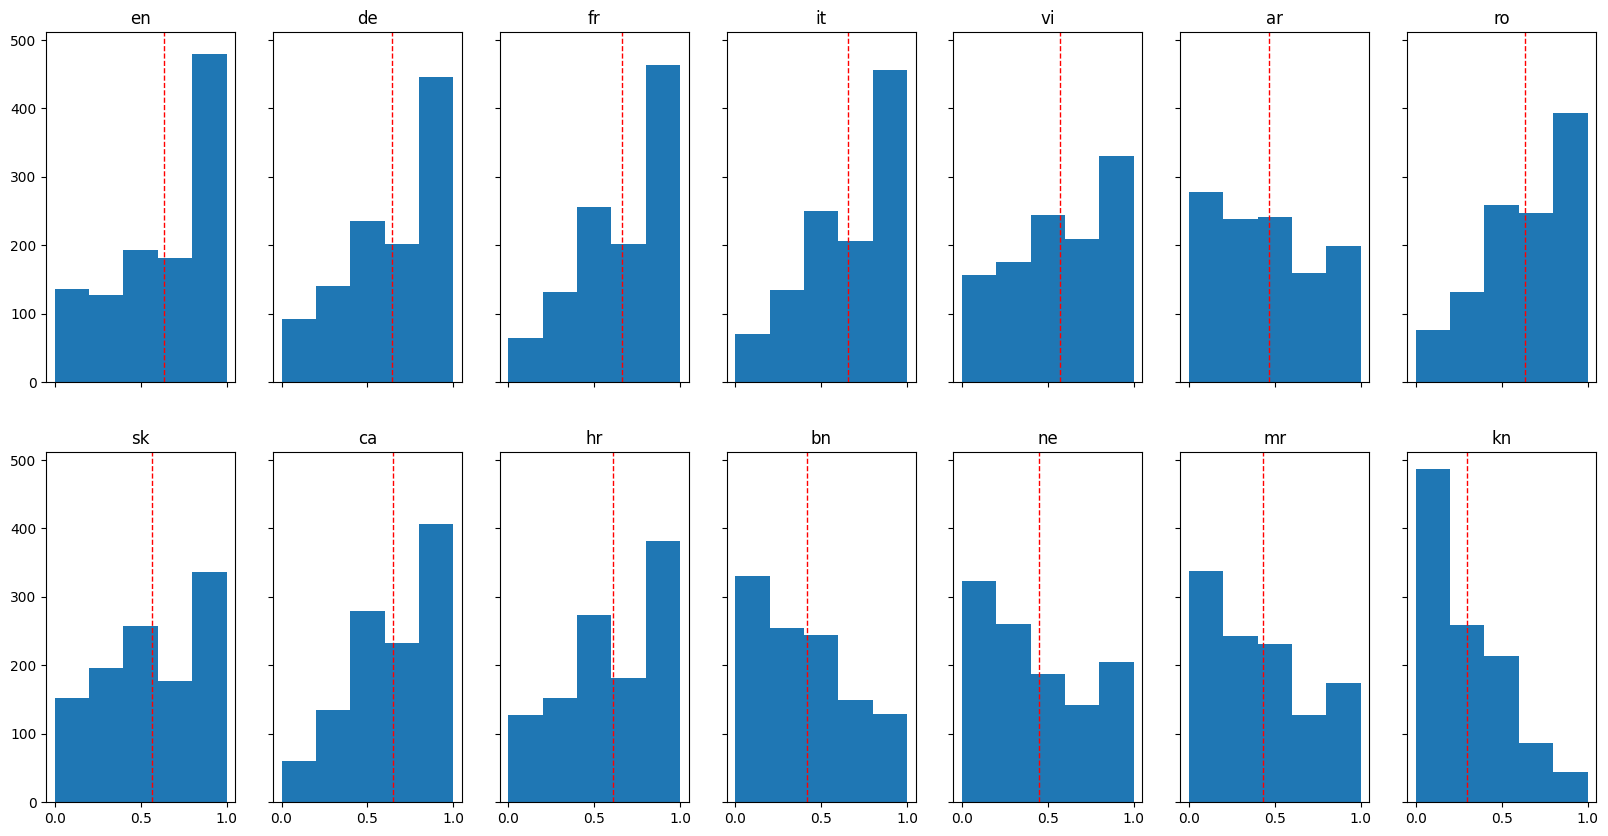

In [68]:
# np.mean(answers_matx, axis=0)

# make 2 x 7 subplots

fig, axs = plt.subplots(2, 7, figsize=(20, 10), sharex=True, sharey=True)

for i in range(2):
    for j in range(7):
        idxs = np.where(train_language_array == i*7+j)
        language = train_language_types[i*7+j]
        axs[i, j].hist(np.mean(answers_matx, axis=0)[idxs], bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0])
        #  plot mean
        axs[i, j].axvline(np.mean(answers_matx, axis=0)[idxs].mean(), color='r', linestyle='dashed', linewidth=1)
        print(np.mean(answers_matx, axis=0)[idxs].mean())
        axs[i, j].set_title(f"{language}")
        
        
        
        # axs[i, j].imshow(answers_matx[i*7+j].reshape(1000, 15), cmap='hot', interpolation='nearest')
        # axs[i, j].set_title(f"checkpoint_{['00500', '01500', '02500', '05000', '10000', '20000'][i*7+j]}")
        # axs[i, j].set_xticks([])
        # axs[i, j].set_yticks([])

In [18]:
img[np.arange(6000), ]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (6000,) (15590,) 

In [39]:

# least to most accurate going left to right
sorted_idxs = np.argsort(img.mean(axis=0))
train_language_array2 = train_language_array[sorted_idxs]

img2 = np.zeros((6000, 15590))

for i in range(15590):
    img2[:, i] = img[:, sorted_idxs[i]]


In [58]:


# turn img2 into color

img3 = np.zeros((6000, 15590, 3))
english_idxs = np.where(train_language_array2==9)[0]

for i in range(15590):
    if i in english_idxs:
        img3[:, i, 0] = img2[:, i]
    else:
        img3[:, i, 0] = img2[:, i]
        img3[:, i, 1] = img2[:, i]
        img3[:, i, 2] = img2[:, i]

Text(0.5, 1.0, 'Croatian')

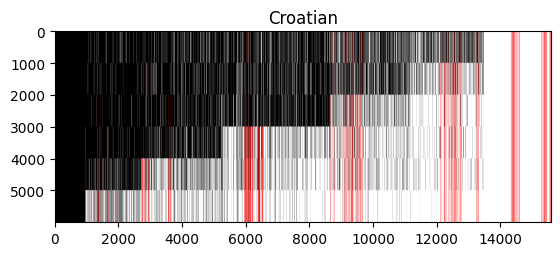

In [59]:

plt.imshow(img3)#, cmap='hot', interpolation='nearest')
plt.title("Croatian")

Text(0.5, 1.0, 'English')

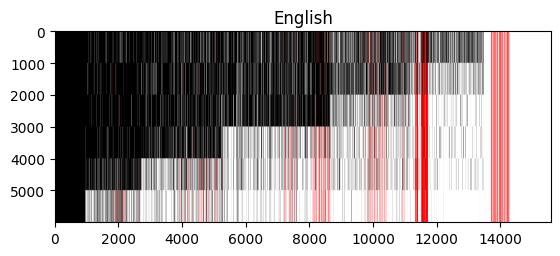

In [60]:


# turn img2 into color

img3 = np.zeros((6000, 15590, 3))
english_idxs = np.where(train_language_array2==0)[0]

for i in range(15590):
    if i in english_idxs:
        img3[:, i, 0] = img2[:, i]
    else:
        img3[:, i, 0] = img2[:, i]
        img3[:, i, 1] = img2[:, i]
        img3[:, i, 2] = img2[:, i]

plt.imshow(img3)#, cmap='hot', interpolation='nearest')
plt.title("English")

Text(0.5, 1.0, 'Kannada')

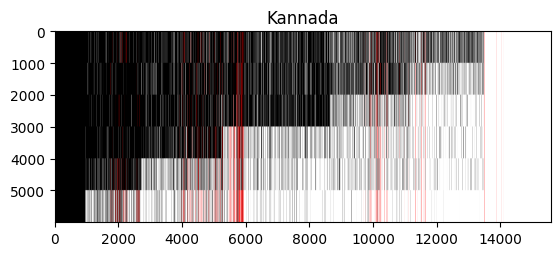

In [61]:


# turn img2 into color

img3 = np.zeros((6000, 15590, 3))
english_idxs = np.where(train_language_array2==13)[0]

for i in range(15590):
    if i in english_idxs:
        img3[:, i, 0] = img2[:, i]
    else:
        img3[:, i, 0] = img2[:, i]
        img3[:, i, 1] = img2[:, i]
        img3[:, i, 2] = img2[:, i]

plt.imshow(img3)#, cmap='hot', interpolation='nearest')
plt.title("Kannada")

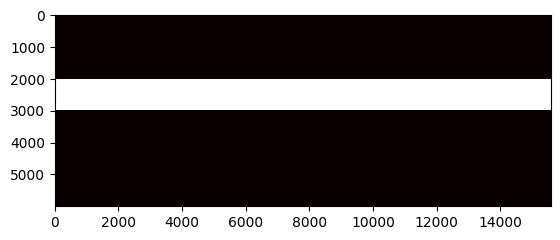

In [26]:
a = np.zeros((6000, 15590))
a[2000:3000] = np.ones((1000, 15590))
plt.imshow(a, cmap='hot', interpolation='nearest')